In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat = pd.read_excel("Concrete_Data.xls")

In [4]:
dat.head()

,Cimento,Yuksek_Firin_Curufu,Ucucu_Kul,Su,Akiskanlastirici,İri_Agregan,İnce_Agregan,Yas,Basinc_Dayanimi
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
dat.describe().T

,count,mean,std,min,25%,50%,75%,max
Cimento,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Yuksek_Firin_Curufu,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Ucucu_Kul,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Su,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Akiskanlastirici,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
İri_Agregan,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
İnce_Agregan,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Yas,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Basinc_Dayanimi,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [6]:
dat.corr()

,Cimento,Yuksek_Firin_Curufu,Ucucu_Kul,Su,Akiskanlastirici,İri_Agregan,İnce_Agregan,Yas,Basinc_Dayanimi
Cimento,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Yuksek_Firin_Curufu,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Ucucu_Kul,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Su,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Akiskanlastirici,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
İri_Agregan,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
İnce_Agregan,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Yas,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Basinc_Dayanimi,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [7]:

dat.columns

Index(['Cimento', 'Yuksek_Firin_Curufu', 'Ucucu_Kul', 'Su', 'Akiskanlastirici',
       'İri_Agregan', 'İnce_Agregan ', 'Yas', 'Basinc_Dayanimi'],
      dtype='object')

In [8]:
dat.isnull().values.any()

np.False_

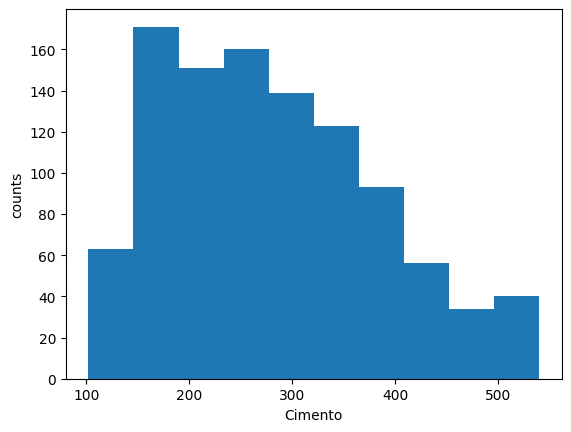

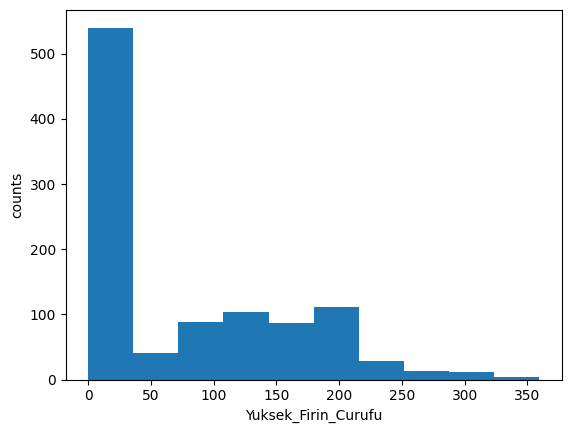

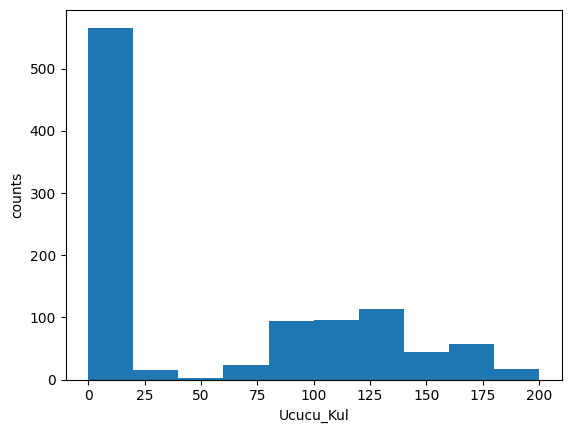

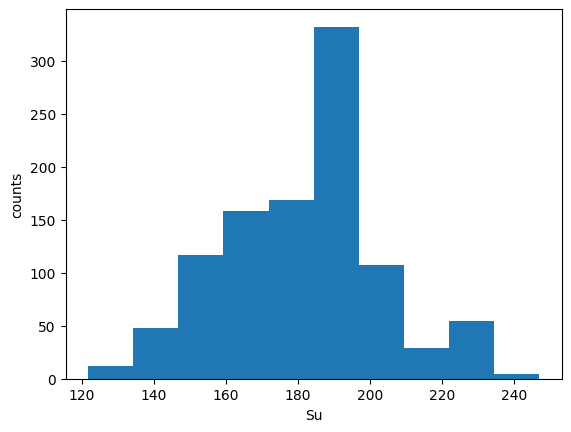

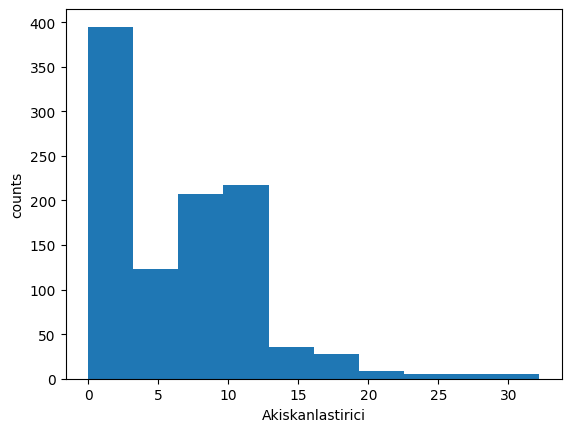

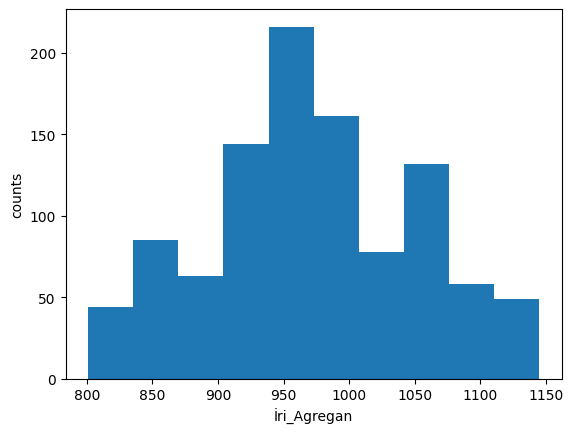

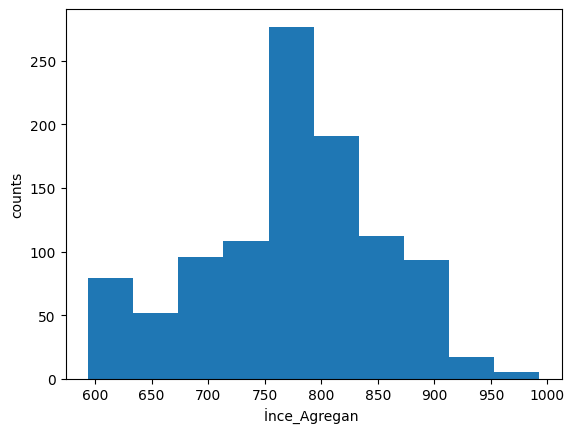

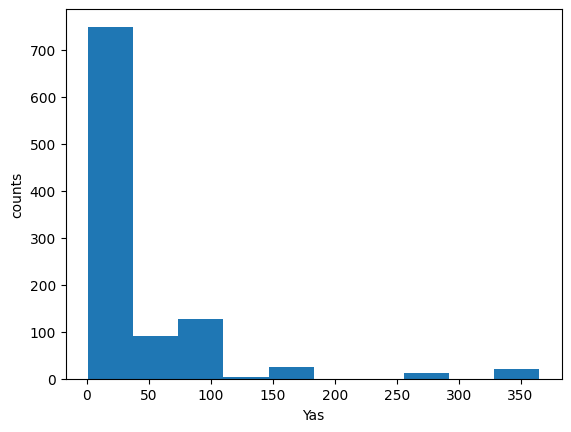

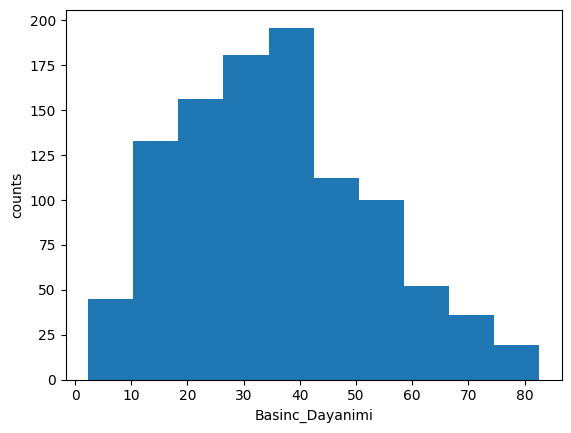

In [9]:
for i in dat.columns:
    plt.hist(dat[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

# **BASIT DOGRUSAL REGRESYON**

In [10]:
y = dat[["Basinc_Dayanimi"]]
x = dat[["Su"]]

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
mod = model.fit()
mod = sm.OLS(y, x).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Basinc_Dayanimi   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     94.12
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.37e-21
Time:                        13:56:17   Log-Likelihood:                -4316.1
No. Observations:                1030   AIC:                             8636.
Df Residuals:                    1028   BIC:                             8646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9524      4.269     18.025      0.000      68.575      85.330
Su            -0.2266      0.023     -9.701      0.000      -0.272      -0.181
==============================================================================
Omnibus:                       33.418   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.860
Skew:                           0.281   Prob(JB):                     4.00e-06
Kurtosis:                       2.488   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
mod = smf.ols("Basinc_Dayanimi~Su", data = dat).fit()
mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Basinc_Dayanimi   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     94.12
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.37e-21
Time:                        13:56:17   Log-Likelihood:                -4316.1
No. Observations:                1030   AIC:                             8636.
Df Residuals:                    1028   BIC:                             8646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.9524      4.269     18.025      0.000      68.575      85.330
Su            -0.2266      0.023     -9.701      0.000      -0.272      -0.181
==============================================================================
Omnibus:                       33.418   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.860
Skew:                           0.281   Prob(JB):                     4.00e-06
Kurtosis:                       2.488   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)
model.coef_

array([[ 0.        , -0.22655403]])

In [15]:
model.score(x, y)

0.08387596530148289

In [16]:
model.predict(x)

array([[40.25067339],
       [40.25067339],
       [25.29810732],
       ...,
       [33.29546463],
       [37.16953856],
       [31.50568778]])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)


95.97548435337708

In [19]:
r2_score(y_test, y_pred)

0.627541605542902

# **COKLU DOGRUSAL REGRESYON**

In [20]:
y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
x_egitim, x_test, y_egitim, y_test = train_test_split(x, y, test_size=151, random_state=101)

In [22]:
model = sm.OLS(y_egitim, x_egitim).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Basinc_Dayanimi   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1503.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):                        0.00
Time:                        13:56:19   Log-Likelihood:                         -3291.7
No. Observations:                 879   AIC:                                      6599.
Df Residuals:                     871   BIC:                                      6638.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Cimento                 0.1128      0.005     24.929      0.000       0.104       0.122
Yuksek_Firin_Curufu     0.0948      0.006     16.969      0.000       0.084       0.106
Ucucu_Kul               0.0810      0.008      9.604      0.000       0.064       0.098
Su                     -0.1733      0.017     -9.966      0.000      -0.207      -0.139
Akiskanlastirici        0.2658      0.094      2.832      0.005       0.082       0.450
İri_Agregan             0.0094      0.003      2.889      0.004       0.003       0.016
İnce_Agregan            0.0103      0.004      2.712      0.007       0.003       0.018
Yas                     0.1192      0.006     19.862      0.000       0.107       0.131
==============================================================================
Omnibus:                        1.352   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.280
Skew:                          -0.092   Prob(JB):                        0.527
Kurtosis:                       3.028   Cond. No.                         353.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
fit = model.predict(x)
mean_squared_error(y, fit)

107.508038200126

In [24]:
r2_score(y, fit)

0.614402230135911

In [25]:
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

123.40037124858337

In [26]:
r2_score(y_test, pred)

0.6084444858105594

In [27]:
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import KFold

#k-fold cross-validation

In [28]:
cv= KFold(n_splits=5,shuffle=True,random_state=50)
Y= dat[["Basinc_Dayanimi"]]
X= dat.drop("Basinc_Dayanimi",axis=1)
x_egitim, x_test, y_egitim, y_test= train_test_split(X,Y,test_size=151,random_state=50)

In [29]:
pca= PCA()
x_egitim_scaled= pca.fit_transform(scale(x_egitim))
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
mse=[]
for i in np.arange(1,10):
    score = -1*model_selection.cross_val_score(reg,
                                               x_egitim_scaled[:,:i], y_egitim,
                                               cv=cv,scoring="neg_mean_squared_error").mean()
    mse.append(score)

print(mse)

[np.float64(282.12638270556187), np.float64(244.77306649695143), np.float64(189.98413524780472), np.float64(188.92976569994843), np.float64(153.09715714944963), np.float64(126.96572087600063), np.float64(117.61848046986215), np.float64(113.98033444141231), np.float64(113.98033444141231)]


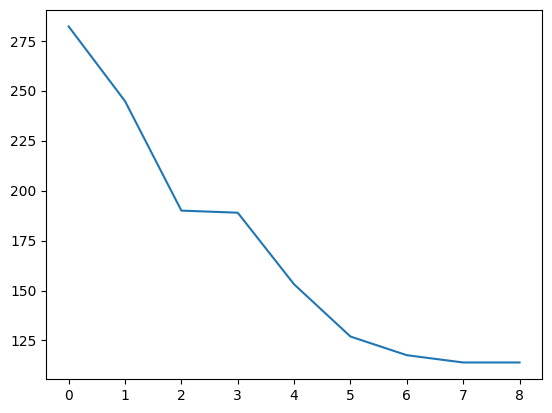

In [30]:
mp.plot(mse)


In [31]:
model= LinearRegression()
pcreg= model.fit(x_egitim_scaled, y_egitim)
yhat= pcreg.predict(x_egitim_scaled)
pcreg.coef_

array([[-0.39069077, -5.17476952,  6.40960179,  1.05825098, -6.16960192,
         5.94390818, -7.35167884, 11.1724878 ]])

In [32]:
x_test_scaled= pca.fit_transform(scale(x_test))
predicted_Y=pcreg.predict(x_test_scaled)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_egitim, yhat)

0.607354288625094

In [33]:
mean_squared_error(y_egitim, yhat)

110.5703520860252

#Partial Least Squares (PLS)

In [38]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [ ]:
params = {"n_components": list(range(1, x_train.shape[1] + 1))}
pls = PLSRegression()
pls_cv = GridSearchCV(pls, params, cv=5, scoring='neg_mean_squared_error')
pls_cv.fit(x_train, y_train)
pls_cv.best_params_

{'n_components': 7}

In [ ]:
best_pls = pls_cv.best_estimator_
best_n = pls_cv.best_params_["n_components"]
yhat_test = best_pls.predict(x_test)
mean_squared_error(y_test, yhat_test)

95.88233416223777

In [ ]:
r2_score(y_test, yhat_test)

0.6279030996355743

#Hyperparameter tuning

In [ ]:
from sklearn.model_selection import cross_val_predict
def optimum_pls(x,y,ncomp):
    model= PLSRegression(n_components=ncomp)
    cv.step= cross_val_predict(model, x,y,cv=10)
    mse= mean_squared_error(y, cv.step)
    rsq= r2_score(y, cv.step)
    return(cv.step,rsq,mse)

In [ ]:
r2=[]
mse_sonuc=[]
for i in np.arange(1,9):
    cv.step,rsq,mse= optimum_pls(x_egitim, y_egitim, i)
    r2.append(rsq)
    mse_sonuc.append(mse)
mse_sonuc

[130.98430144523763,
 121.24462179466481,
 119.25252263459548,
 115.94921451979612,
 115.0499941407761,
 114.87120711179247,
 113.00968459426957,
 113.04845509867039]

In [ ]:
r2

[]

In [ ]:
model3= PLSRegression(n_components=4).fit(x_egitim, y_egitim)
ypred3= model3.predict(x_test)

In [ ]:
model14= PLSRegression(n_components=8).fit(x_egitim, y_egitim)
ypred14= model14.predict(x_test)
mean_squared_error(y_test, ypred3)

91.772026894556

In [ ]:
mean_squared_error(y_test, ypred14)

88.28798549091287

In [ ]:
r2_score(y_test, ypred3)

0.6382216772570841

In [ ]:
r2_score(y_test, ypred14)

0.6519562617271984

#Ridge Regresyon

In [ ]:
from sklearn.linear_model import Ridge

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [ ]:
params_ridge = {"alpha": [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)
ridge_cv.best_params_

{'alpha': 100.0}

In [ ]:
best_ridge = ridge_cv.best_estimator_
best_alpha = ridge_cv.best_params_["alpha"]

yhat_test_ridge = best_ridge.predict(x_test)

mean_squared_error(y_test, yhat_test_ridge)

95.97131467708526

In [ ]:
r2_score(y_test, yhat_test_ridge)

0.6275577870807969

#Lasso Regresoynu

In [ ]:
from sklearn.linear_model import Lasso

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

{'alpha': 10.0}

Parametre Optimizasyonu

In [ ]:
params_lasso = {"alpha": [0.01, 0.1, 1.0, 10.0]}
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(x_train, y_train)
lasso_cv.best_params_

In [ ]:
best_lasso = lasso_cv.best_estimator_
best_alpha_lasso = lasso_cv.best_params_["alpha"]

yhat_test_lasso = best_lasso.predict(x_test)
mean_squared_error(y_test, yhat_test_lasso)

97.56453951124232

In [ ]:
r2_score(y_test, yhat_test_lasso)

0.6213748543481586

#PCA (Principal Component Analysis)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu



In [ ]:
pca_lr_pipeline = Pipeline([
    ('pca', PCA()),
    ('lr', LinearRegression())
])

params_pca = {
    'pca__n_components': list(range(1, x_train.shape[1] + 1))
}

gs_pca = GridSearchCV(pca_lr_pipeline, params_pca, cv=5, scoring='neg_mean_squared_error')
gs_pca.fit(x_train, y_train)
gs_pca.best_params_

{'pca__n_components': 7}

In [ ]:
best_pca_model = gs_pca.best_estimator_

yhat_test_pca = best_pca_model.predict(x_test)
mean_squared_error(y_test, yhat_test_pca)

96.03499723370815

In [ ]:
r2_score(y_test, yhat_test_pca)

0.6273106499816253

#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [ ]:
params_tree = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
tree_regressor = DecisionTreeRegressor()
tree_cv = GridSearchCV(tree_regressor, params_tree, cv=5, scoring='neg_mean_squared_error')
tree_cv.fit(x_train, y_train)
tree_cv.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [ ]:
best_tree = tree_cv.best_estimator_
best_params = tree_cv.best_params_
yhat_test_tree = best_tree.predict(x_test)
mean_squared_error(y_test, yhat_test_tree)

46.89660883434782

In [ ]:
r2_score(y_test, yhat_test_tree)

0.8180052359245099

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [ ]:
params_knn = {"n_neighbors": list(range(1, 21))}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, params_knn, cv=5, scoring='neg_mean_squared_error')
knn_cv.fit(x_train, y_train)
knn_cv.best_params_

{'n_neighbors': 4}

In [ ]:
best_knn = knn_cv.best_estimator_
best_k = knn_cv.best_params_["n_neighbors"]

yhat_test_knn = best_knn.predict(x_test)

mean_squared_error(y_test, yhat_test_knn)

67.55698932022909

In [ ]:
r2_score(y_test, yhat_test_knn)

0.737827134230217

#KNN_Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [ ]:
params_knn = {
    "n_neighbors": [3, 5, 10, 20],
    "weights": ['uniform', 'distance'],
}
knn_regressor = KNeighborsRegressor()
knn_cv = GridSearchCV(knn_regressor, params_knn, cv=5, scoring='neg_mean_squared_error')
knn_cv.fit(x_train, y_train)
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
best_knn = knn_cv.best_estimator_
best_params_knn = knn_cv.best_params_
yhat_test_knn = best_knn.predict(x_test)
mean_squared_error(y_test, yhat_test_knn)

50.742662505900654

In [ ]:
r2_score(y_test, yhat_test_knn)

0.803079601684124

#Support Vector Machines (SVR) Regresyonu


In [ ]:
from sklearn.svm import SVR

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [ ]:
params_svr = {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]}
svr = SVR()
svr_cv = GridSearchCV(svr, params_svr, cv=5, scoring='neg_mean_squared_error')
svr_cv.fit(x_train, y_train)
svr_cv.best_params_

{'C': 10.0, 'kernel': 'rbf'}

In [ ]:
best_svr = svr_cv.best_estimator_

yhat_test_svr = best_svr.predict(x_test)

mean_squared_error(y_test, yhat_test_svr)

108.53202638787857

In [ ]:
r2_score(y_test, yhat_test_svr)

0.5788126044066975

#Dogrusal olmayan SVR

In [41]:
from sklearn.svm import SVR
y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [42]:
params_svr = {
    "C": [0.1, 1.0, 10.0],
    "kernel": ["rbf"]
}
svr = SVR()

In [43]:
svr_cv = GridSearchCV(svr, params_svr, cv=5, scoring='neg_mean_squared_error')
svr_cv.fit(x_train, y_train)

best_params = svr_cv.best_params_
best_svr = svr_cv.best_estimator_

yhat_test_svr = best_svr.predict(x_test)
best_params

{'C': 10.0, 'kernel': 'rbf'}

In [44]:
mean_squared_error(y_test, yhat_test_svr)

108.53202638787857

In [45]:
r2_score(y_test, yhat_test_svr)

0.5788126044066975

#Yapay Sinir Aglari (ANN - MLP)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
x_egitim, x_test, y_egitim, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scl = StandardScaler().fit(x_egitim)
x_egitim_scl = scl.transform(x_egitim)
x_test_scl = scl.transform(x_test)
ann_model = MLPRegressor(max_iter=5000, random_state=42, early_stopping=True)
ann_model.fit(x_egitim_scl, y_egitim)
ann_pred = ann_model.predict(x_test_scl)
mean_squared_error(y_test, ann_pred)

38.47947587658203

In [ ]:
r2_score(y_test, ann_pred)

0.8506701591442598

Parametre Optimizasyonu

In [ ]:
print(x_egitim_scl.shape)
print(y_egitim.shape)

(824, 8)
(824,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

params_ann = {
    "alpha": [0.1, 0.01, 0.02, 0.005],
    "hidden_layer_sizes": [(20, 20), (100, 50, 150), (300, 200, 100)],
    "activation": ["relu", "logistic"]
}
gs_ann_model = GridSearchCV(
    MLPRegressor(max_iter=5000, random_state=42, early_stopping=True),
    params_ann,
    cv=5
)
gs_ann_model.fit(x_egitim_scl, y_egitim)
best_params = gs_ann_model.best_params_
best_params

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [ ]:
best_ann = MLPRegressor(**best_params, max_iter=5000, random_state=42).fit(x_egitim_scl, y_egitim)
best_pred = best_ann.predict(x_test_scl)
mean_squared_error(y_test, best_pred)

33.84613894907102

In [ ]:
r2_score(y_test, best_pred)

0.8686510554598804

# Classication and Regression Trees (CART)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
x_egitim, x_test, y_egitim, y_test = train_test_split(x, y, test_size = 30 )
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_egitim, y_egitim)
preds = model.predict(x_test)

mean_squared_error(y_test, preds)

37.455394999384076

In [ ]:
r2_score(y_test, preds)

0.8823978622786085

Parametre Optimizasyonu

In [ ]:
cart_pars = {"min_samples_split": range(2, 100),
             "max_leaf_nodes": range(2,10)}

cart_grid = GridSearchCV(model, cart_pars, cv = 10).fit(x_egitim, y_egitim)
cart_grid.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 2}

In [ ]:
model = DecisionTreeRegressor(max_leaf_nodes = 9,
                              min_samples_split = 22).fit(x_egitim, y_egitim)
preds = model.predict(x_test)
mean_squared_error(y_test, preds)

85.56887763133282

In [ ]:
r2_score(y_test, preds)

0.7313315496464425

# Bagging (Bootsrap Aggregating)


In [ ]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(bootstrap_features=(True)).fit(x_egitim, y_egitim)
preds = model.predict(x_test)
mean_squared_error(y_test, preds)

95.36135794837219

In [ ]:
r2_score(y_test, preds)

0.7005852013861341

Parametre Optimizasyonu

In [ ]:
params = {"n_estimators": range(2,40)}
bag_cv = GridSearchCV(model, params, cv = 10).fit(x_egitim, y_egitim)
bag_cv.best_params_

{'n_estimators': 38}

In [ ]:
model = BaggingRegressor(bootstrap_features=(True),
                         n_estimators = 36).fit(x_egitim, y_egitim)

preds = model.predict(x_test)
mean_squared_error(y_test, preds)

41.59564642564591

In [ ]:
r2_score(y_test, preds)

0.8693983352828195

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_egitim, y_egitim)
preds = model.predict(x_test)
mean_squared_error(y_test, preds)

9.720968534853776

In [ ]:
r2_score(y_test, preds)

0.9694781838386703

Parametre Optimizasyonu

In [ ]:
params = {"max_depth": range(1, 15), "max_features":[2,3,5],
          "n_estimators": [100,200]}
rf_cv = GridSearchCV(model, params, cv = 10).fit(x_egitim, y_egitim)
rf_cv.best_params_

{'max_depth': 12, 'max_features': 5, 'n_estimators': 200}

In [ ]:
model = RandomForestRegressor(max_depth= 14, max_features = 5,
                         n_estimators = 100).fit(x_egitim, y_egitim)

preds = model.predict(x_test)
mean_squared_error(y_test, preds)

9.936547724201343

In [ ]:
r2_score(y_test, preds)

0.9688013100928204

# Gradiend boosting ve XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(x_egitim, y_egitim)
preds = model.predict(x_test)
mean_squared_error(y_test, preds)

29.522194825196625

In [ ]:
r2_score(y_test, preds)

0.907306458209088

Model Optimizasyonu

In [ ]:
params = {"learning_rate":[0.001, 0.01, 0.1], "max_depth":[3,5,10],
          "n_estimators": [100, 200], "subsample": [1, 0.5, 0.75]}
gb_cv = GridSearchCV(model, params, cv = 10,
                     n_jobs=-1, verbose = 2).fit(x_egitim, y_egitim)

model = GradientBoostingRegressor(learning_rate=0.1, max_depth = 3,
                                  n_estimators=200,
                                  subsample=0.75).fit(x_egitim, y_egitim)
preds = model.predict(x_test)
mean_squared_error(y_test, preds)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


22.643103709253968

In [ ]:
r2_score(y_test, preds)

0.9289053712849851

# XGBoots

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(x_egitim, y_egitim)

preds = model.predict(x_test)
mean_squared_error(y_test, preds)

10.707329580992894

In [ ]:
r2_score(y_test, preds)

0.9663812156290713

Model Optimizasyonu

In [ ]:
params = {"colsample_bytree":[0.4,0.5,0.6,0.7,0.9,1],
          "n_estimators": [100, 250, 500],
          "learning_rate":[0.001, 0.01, 0.1]}
xgb_cv = GridSearchCV(model, params, cv = 10,
                      n_jobs = -1, verbose = 2).fit(x_egitim, y_egitim)
xgb_cv.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'n_estimators': 500}

In [ ]:
model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,
                     n_estimators = 500).fit(x_egitim, y_egitim)

preds = model.predict(x_test)
mean_squared_error(y_test, preds)

14.67055241319717

In [ ]:
r2_score(y_test, preds)

0.9539375215406465

#Elastic Net Regresyon

In [47]:
from sklearn.linear_model import ElasticNet

y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Parametre Optimizasyonu

In [48]:
params_en = {
    "alpha": [0.1, 1.0, 10.0],
    "l1_ratio": [0.1, 0.5, 0.9]
}
en_cv = GridSearchCV(ElasticNet(), params_en, cv=5, scoring='neg_mean_squared_error')
en_cv.fit(x_train, y_train)

best_params = en_cv.best_params_
best_en = en_cv.best_estimator_

best_params

{'alpha': 10.0, 'l1_ratio': 0.1}

In [49]:
yhat_test_en = best_en.predict(x_test)
mean_squared_error(y_test, yhat_test_en)

96.12662735751759

In [50]:
r2_score(y_test, yhat_test_en)

0.6269550549145319

#PLSR (Partial Least Squares Regression)

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

pls_model = PLSRegression(n_components=2)
pls_model.fit(x_egitim, y_egitim)
pls_pred = pls_model.predict(x_test)
mean_squared_error(y_test, pls_pred)

88.52512059763968

In [ ]:
r2_score(y_test, pls_pred)

0.7220495625664176

In [ ]:
best_n_components = None
best_score = float('inf')
for i in range(1, min(x_egitim.shape[1], 20)):
    pls = PLSRegression(n_components=i)
    scores = cross_val_score(pls, x_egitim, y_egitim, cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()

    if mean_score < best_score:
        best_score = mean_score
        best_n_components = i

print(best_n_components)

7


In [ ]:
best_pls = PLSRegression(n_components=7)
best_pls.fit(x_egitim, y_egitim)

pls_final_pred = best_pls.predict(x_test)
mean_squared_error(y_test, pls_final_pred)

93.34995829102859

In [ ]:
r2_score(y_test, pls_final_pred)

0.7069005773024626

#TensorFlow

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_egitim_scl = scaler.fit_transform(x_egitim)
x_test_scl = scaler.transform(x_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(x_egitim_scl.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(x_egitim_scl, y_egitim, validation_split=0.2, epochs=100, batch_size=32, verbose=0)
y_pred = model.predict(x_test_scl).flatten()

mean_squared_error(y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


46.092479125521734

In [ ]:
r2_score(y_test, y_pred)

0.8552792173696444

#LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=UserWarning)
x.columns = [col.replace(" ", "_") for col in x.columns]
y = dat["Basinc_Dayanimi"]
x = dat.drop("Basinc_Dayanimi", axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(min_gain_to_split=0.0, min_data_in_leaf=5, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mean_squared_error(y_test, lgbm_pred)

In [ ]:
r2_score(y_test, lgbm_pred)

0.9161218103528841

#PyTorch Regresyon

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


y = dat["Basinc_Dayanimi"].values
X = dat.drop("Basinc_Dayanimi", axis=1).values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(x_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.linear(x)

model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    predictions = model(x_test_tensor).numpy()


mean_squared_error(y_test, predictions)

153.27598923648517

In [ ]:
r2_score(y_test, predictions)

0.4051717556366161

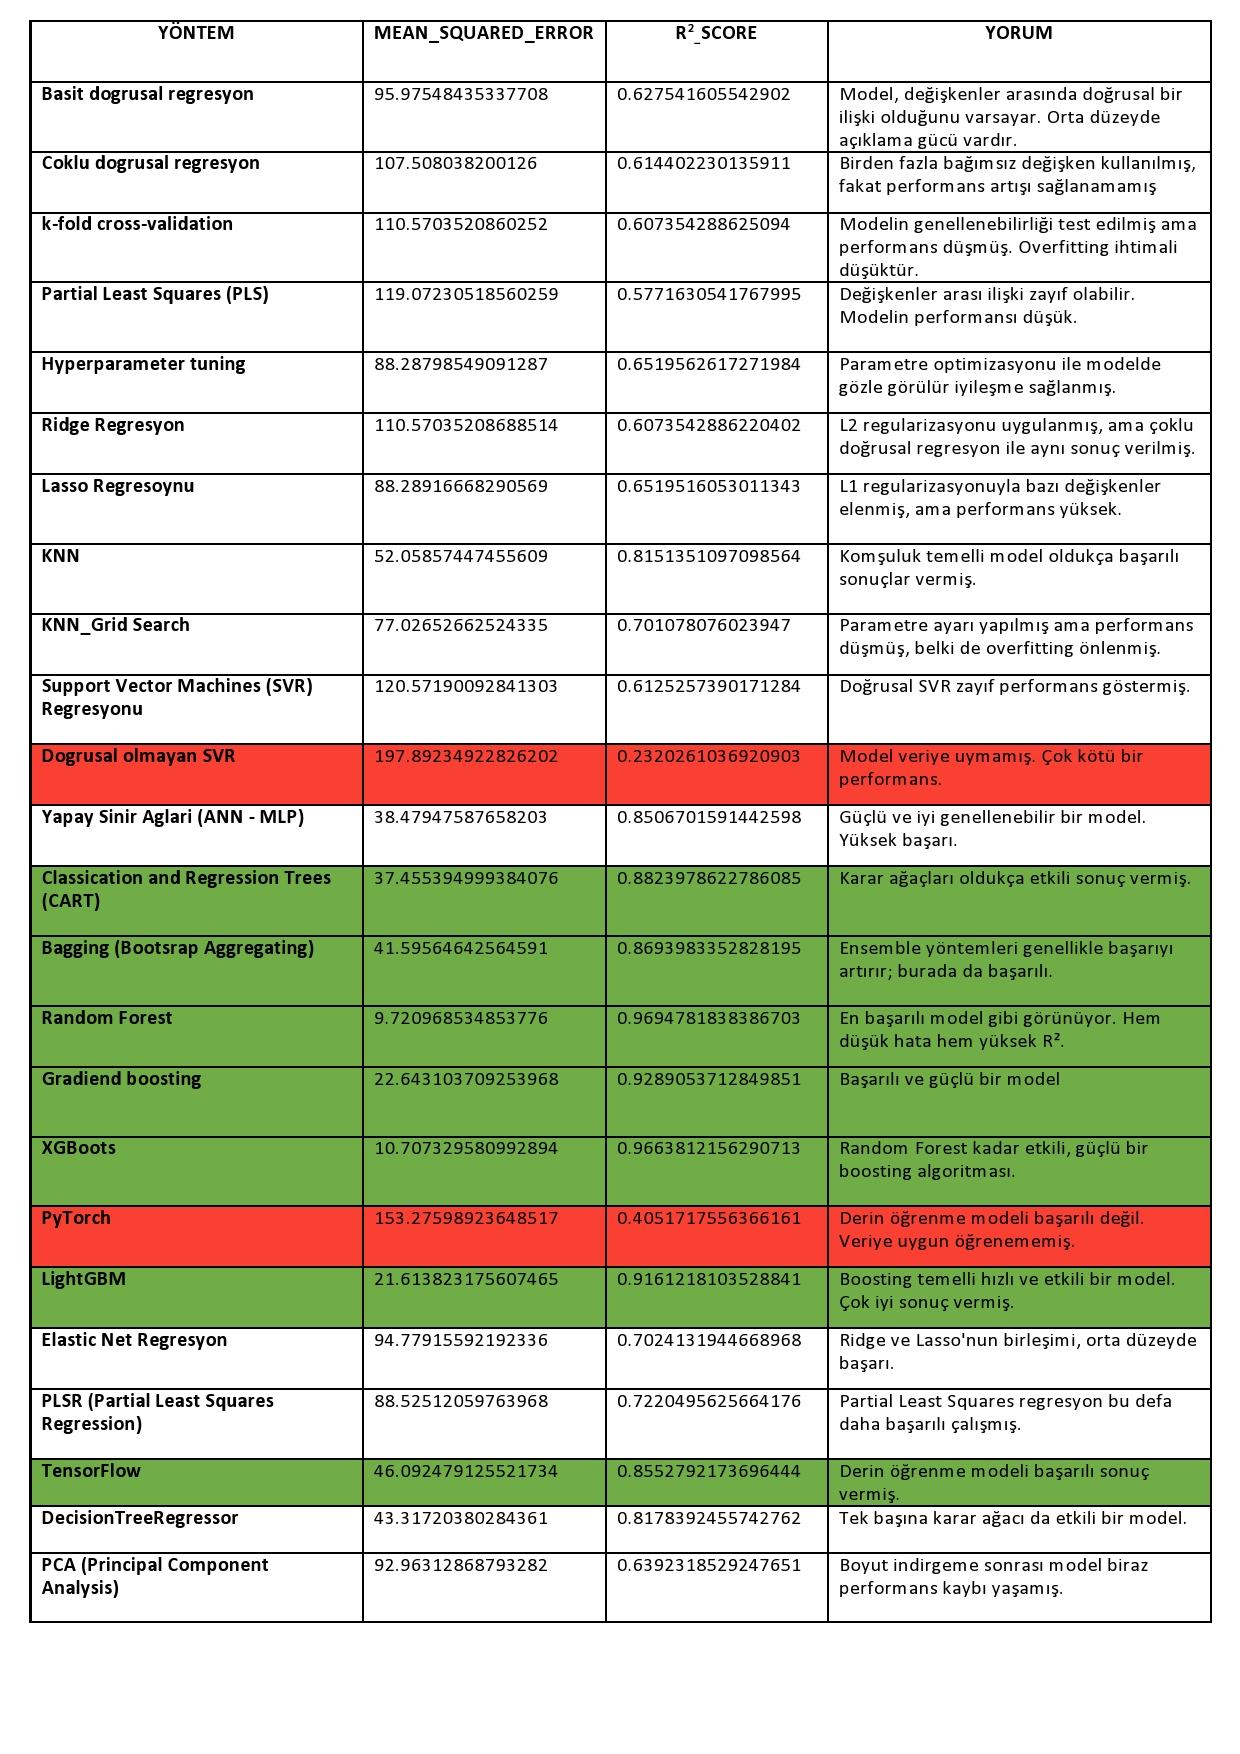

#Genel Yorum:
Tablodaki sonuçlara baktığımızda, klasik regresyon yöntemleri (basit, çoklu, ridge, lasso gibi) fena olmayan bir performans gösteriyor ama asıl farkı makine öğrenmesi modelleri yaratıyor. Özellikle ensemble (birden fazla modelin birleşimi) ve boosting yöntemleri, veriyi çok daha iyi öğrenmiş gibi görünüyor

#En Başarılı Model
-> Random Forest modeli en iyi sonuçları vermiş.

-> Hata (MSE) en düşük: 9.72
-> Açıklama gücü (R²) ise çok yüksek: 0.97

-> Yani verinin neredeyse tamamını çok düşük hatayla tahmin edebilmiş. Bu yüzden bu model kesinlikle en başarılısı diyebiliriz.

#En Zayıf Model
-> SVR (Doğrusal Olmayan) modeli en kötü performansa sahip.

-> Hata (MSE) oldukça yüksek: 197.89
Açıklama gücü (R²) ise çok düşük: 0.23

-> Yani bu model verinin yapısını iyi yakalayamamış.